In [14]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Optional
from langgraph.prebuilt import ToolNode

In [15]:
class HRHiringState(TypedDict): 
    role: Optional[str]
    job_description: Optional[str]
    approval: Optional[bool]

In [16]:
def prompt_for_role(state: HRHiringState) -> str:
    role = input("Please enter the role you want to hire for: ")
    return {'role': role}

def generate_jd(state: HRHiringState) -> str:
    role = state['role']
    jd = f'Create a job description for the role of {role}.'
    return {'job_description':jd}

def human_approval(state: HRHiringState) -> bool:
    approval_input = input("Do you approve the JD? (True/False): ").strip().lower()
    approval = approval_input == "True"
    return {"approval": approval}

def post_linkedin(state: HRHiringState) -> str:
    pass


In [17]:
builder = StateGraph(HRHiringState)

# Define Nodes
builder.add_node('prompt_for_role', prompt_for_role)
builder.add_node('generate_jd', generate_jd)
builder.add_node('human_approval', human_approval)
builder.add_node('post_linkedin', post_linkedin)

# Define Edges
builder.add_edge(START, 'prompt_for_role')
builder.add_edge('prompt_for_role', 'generate_jd')
builder.add_edge('generate_jd', 'human_approval')
builder.add_edge('human_approval', 'post_linkedin')

def approval_conditional(state: HRHiringState) -> str:
    return 'post_linkedin' if state['approval'] else 'prompt_for_role'

builder.add_conditional_edges('human_approval', approval_conditional)
builder.add_edge('post_linkedin', END)

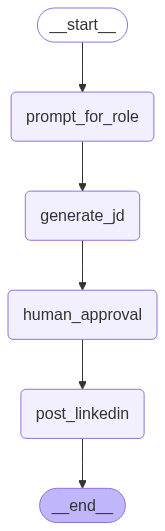

In [18]:
graph = builder.compile()
graph

In [ ]:
# initial_state = HRHiringState(role='Data scientist', job_description='Staff Data scientist', approval=None)
# graph.invoke(initial_state)

In [ ]:
import os
from groq import Groq
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Optional

class HRHiringState(TypedDict): 
    role: Optional[str]
    job_description: Optional[str]
    approval: Optional[bool]

def prompt_for_role(state: HRHiringState) -> str:
    role = input("Please enter the role you want to hire for: ")
    return {'role': role}

def generate_jd(state: HRHiringState) -> dict:
    role = state['role']
    client = Groq(api_key=os.environ.get("GROQ_API_KEY"))
    prompt = f"Write a detailed job description for the role of {role}."
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "user", "content": prompt}
        ],
        model="llama3-8b-8192"
    )
    jd = chat_completion.choices[0].message.content
    return {'job_description': jd}

def human_approval(state: HRHiringState) -> bool:
    approval_input = input("Do you approve the JD? (yes/no): ").strip().lower()
    approval = approval_input == "yes"
    return {"approval": approval}

def post_linkedin(state: HRHiringState) -> dict:
    return {"post_status": "yes posted"}

def wait_2_days(state: HRHiringState) -> str:
    print("Waiting for 2 days...")
    return {}
def monitor_applications(state: HRHiringState) -> str:
    print("Monitoring applications...")
    return {}
def select_candidates(state: HRHiringState) -> str:
    print("Selecting candidates...")
    return {}
def schedule_interviews(state: HRHiringState) -> str:
    print("Scheduling interviews...")
    return {}


builder = StateGraph(HRHiringState)

# Define Nodes
builder.add_node('prompt_for_role', prompt_for_role)
builder.add_node('generate_jd', generate_jd)
builder.add_node('human_approval', human_approval)
builder.add_node('post_linkedin', post_linkedin)
builder.add_node('wait_2_days',wait_2_days)
builder.add_node('monitor_applications', monitor_applications)
builder.add_node('select_candidates', select_candidates)
builder.add_node('schedule_interviews', schedule_interviews)



# Define Edges
builder.add_edge(START, 'prompt_for_role')
builder.add_edge('prompt_for_role', 'generate_jd')
builder.add_edge('generate_jd', 'human_approval')

def approval_conditional(state: HRHiringState) -> str:
    return 'post_linkedin' if state['approval'] else 'prompt_for_role'

builder.add_edge('human_approval', 'post_linkedin')  # shown visually
builder.add_edge('human_approval', 'prompt_for_role')  # shown visually

builder.add_conditional_edges('human_approval', approval_conditional)
builder.add_edge('post_linkedin', 'wait_2_days')
builder.add_edge('wait_2_days', 'monitor_applications')
builder.add_edge('monitor_applications','select_candidates')
builder.add_edge('select_candidates','schedule_interviews')
builder.add_edge('schedule_interviews', END)


if __name__ == "__main__":
    graph = builder.compile()
    final_state = graph.invoke({})
    print("\nWorkflow complete. Final state:")
    print(final_state) 
    


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [20]:
graph.get_graph()


Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'prompt_for_role': Node(id='prompt_for_role', name='prompt_for_role', data=prompt_for_role(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'generate_jd': Node(id='generate_jd', name='generate_jd', data=generate_jd(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'human_approval': Node(id='human_approval', name='human_approval', data=human_approval(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'post_linkedin': Node(id='post_linkedin', name='post_linkedin', data=post_linkedin(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'wait_2_days': Node(id='wait_2_days', name='wai

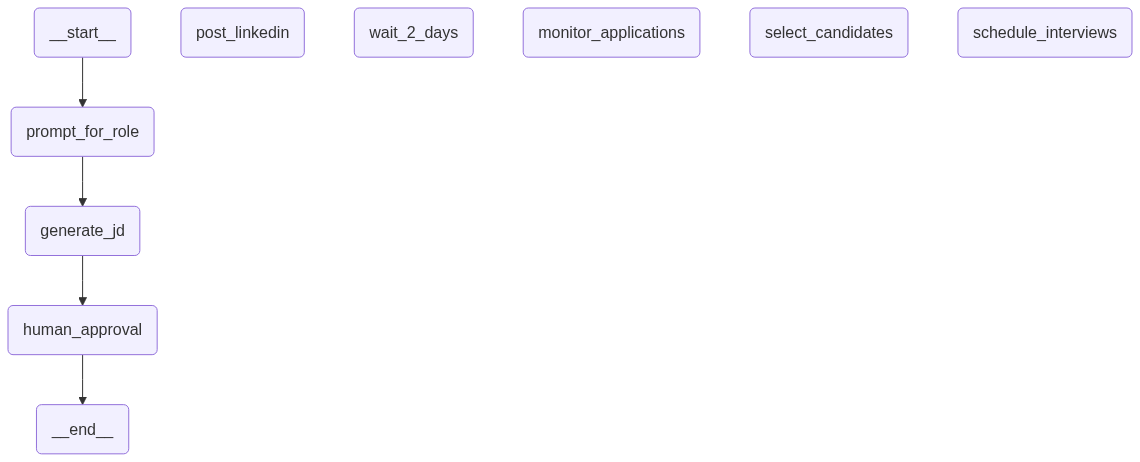

In [21]:
graph